Imports

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy


read in data

In [ ]:
df=pd.read_csv("/content/beatlesfull.csv")

Identify common and unique authors across subreddits

In [ ]:
beatles_authors=list(df[df['subreddit']=="beatles"].author.unique())
thebeatles_authors=list(df[df['subreddit']=="TheBeatles"].author.unique())
beatlescj_author=list(df[df['subreddit']=="beatlescirclejerk"].author.unique())

In [ ]:
total_authors=[len(beatlescj_author), len(beatles_authors), len(thebeatles_authors),len(beatlescj_author), ]

In [ ]:
(set(thebeatles_authors).intersection(set(beatles_authors)).intersection(beatlescj_author))


{'Jello_The2nd', 'Molass5732', 'kidnamedchild', nan, 'sminking'}

In [ ]:
len(df.author.unique())

869

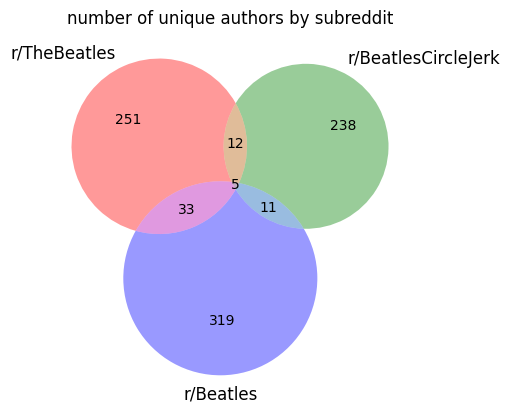

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles, venn2

set1 = set(thebeatles_authors)
set2 = set(beatlescj_author)
set3 = set(beatles_authors)

venn3([set1, set2, set3], ('r/TheBeatles', 'r/BeatlesCircleJerk','r/Beatles'))
# c = venn3_circles(subsets=([set1, set2, set3]), linestyle='dashed')

plt.title("number of unique authors by subreddit")
plt.show()

label subreddits beatlescirclejerk = 0, TheBeatles = 1, Beatles=2

In [ ]:
df["sub"]=df['subreddit'].apply(lambda x : 0 if x=="beatlescirclejerk" else (1 if x=="TheBeatles" else 2))

split x and y and lemmatize for analysis

In [ ]:
X=df["all_words"]
y=df['sub']

In [ ]:
beatles_df=df.loc[df['sub']==2]
thebeatles_df=df.loc[df['sub']==1]
beatlescj_df=df.loc[df['sub']==0]

In [ ]:
Xb=beatles_df["all_words"]
Xtb=thebeatles_df["all_words"]
Xcj=beatlescj_df["all_words"]

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def lemmatizer(sentence):
  doc = nlp(sentence)
  # for word in doc:
  #   if word.is_alpha:

  return [word.lemma_ for word in doc if word.is_alpha]


#count vectorizer
cvect = CountVectorizer(tokenizer = lemmatizer, max_features = 500)

#transform
# cvect.fit_transform(X_test)

In [ ]:
cvect_b = CountVectorizer(tokenizer = lemmatizer,stop_words='english')
cvect_tb = CountVectorizer(tokenizer = lemmatizer,stop_words='english')
cvect_cj = CountVectorizer(tokenizer = lemmatizer,stop_words='english')

In [ ]:
X_b = cvect_b.fit_transform(Xb)
X_tb = cvect_tb.fit_transform(Xtb)
X_cj = cvect_cj.fit_transform(Xcj)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


In [ ]:
X_b

<500x6781 sparse matrix of type '<class 'numpy.int64'>'
	with 29604 stored elements in Compressed Sparse Row format>

In [ ]:
d_f_xb = pd.DataFrame(X_b.toarray(), columns = cvect_b.get_feature_names_out())
d_f_xtb = pd.DataFrame(X_tb.toarray(), columns = cvect_tb.get_feature_names_out())
d_df_xcj = pd.DataFrame(X_cj.toarray(), columns = cvect_cj.get_feature_names_out())

create df to analyze words

In [ ]:
d_df_xb

,I,aaaaaaa,aah,aaron,abandon,abbey,abbie,abbreviation,abby,abc,...,zapple,zeitgeist,zemeckis,zeppelin,zero,ziggy,zombie,zoo,zoom,zydeco
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,53,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


review top 30 words of each sub

In [ ]:
d_df_xb.sum().nlargest(30)

I          2643
beatle      808
song        651
like        605
paul        497
album       443
love        429
think       407
john        401
just        337
george      324
know        322
good        307
make        279
say         278
time        256
really      223
day         213
look        205
play        205
music       195
great       181
year        181
come        178
let         178
ringo       166
lennon      165
band        162
version     160
people      159
dtype: int64

In [ ]:
d_df_xtb.sum().nlargest(30)

I          2026
song        650
beatle      604
album       422
like        371
love        307
paul        274
think       268
john        257
good        234
just        232
know        209
make        204
george      200
version     177
say         175
time        159
really      153
look        151
day         150
dtype: int64

I          53.076856
song       24.430004
beatle     24.148407
album      18.616899
like       15.210450
love       15.089861
john       14.385262
paul       14.176519
good       12.233746
think      11.708235
make       11.461335
version    11.317554
george     11.253174
just       10.749832
know       10.224803
look        9.958597
lennon      9.495468
cover       9.267399
day         9.136179
let         8.432973

In [ ]:
d_df_xcj.sum().nlargest(30)

I         721
beatle    254
like      187
john      152
paul      145
know      105
look      105
song      103
think     100
jahn       99
just       98
make       96
say        84
ringo      82
good       80
love       80
number     79
shit       75
george     71
lennon     67
time       67
want       62
come       61
fuck       50
album      49
let        49
beeble     48
day        48
people     47
beat       46
dtype: int64

In [ ]:
top_words=pd.DataFrame([d_df_xb.sum().nlargest(20),d_df_xtb.sum().nlargest(20),d_df_xcj.sum().nlargest(20)])

In [ ]:
top_words.shape

(3, 26)

In [ ]:
top_words["subr"]=["beatles", "TheBeatles", "beatlescirclejerk"]

In [ ]:
top_words.set_index('subr', inplace=True)

Top beatles across top twenty  words using countvectorizer

In [ ]:
top_beatles=top_words[['john','paul','george','ringo']]
top_beatles

,john,paul,george,ringo
subr,,,,
beatles,401.0,497.0,324.0,NaN
TheBeatles,257.0,274.0,200.0,NaN
beatlescirclejerk,152.0,145.0,71.0,82.0


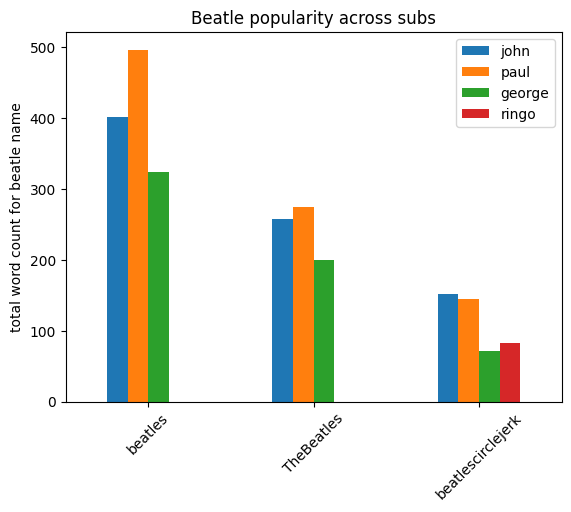

In [ ]:
top_beatles.plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Beatle popularity across subs")
plt.ylabel("total word count for beatle name")
plt.xlabel("");


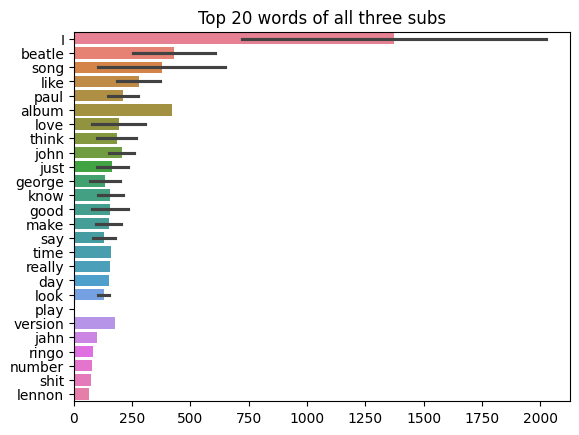

In [ ]:
sns.barplot(top_words[:][1:], orient="y")
plt.title("Top 20 words of all three subs");


In [ ]:
tfidf_b = TfidfVectorizer(tokenizer = lemmatizer,stop_words='english')
tfidf_tb = TfidfVectorizer(tokenizer = lemmatizer,stop_words='english')
tfidf_cj = TfidfVectorizer(tokenizer = lemmatizer,stop_words='english')


In [ ]:
tX_b = tfidf_b.fit_transform(Xb)
tX_tb = tfidf_tb.fit_transform(Xtb)
tX_cj = tfidf_cj.fit_transform(Xcj)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


In [ ]:
t_df_xb = pd.DataFrame(tX_b.toarray(), columns = tfidf_b.get_feature_names_out())
t_df_xtb = pd.DataFrame(tX_tb.toarray(), columns = tfidf_tb.get_feature_names_out())
t_df_xcj = pd.DataFrame(tX_cj.toarray(), columns = tfidf_cj.get_feature_names_out())

In [ ]:
t_df_xtb.sum().nlargest(20)

I          53.076856
song       24.430004
beatle     24.148407
album      18.616899
like       15.210450
love       15.089861
john       14.385262
paul       14.176519
good       12.233746
think      11.708235
make       11.461335
version    11.317554
george     11.253174
just       10.749832
know       10.224803
look        9.958597
lennon      9.495468
cover       9.267399
day         9.136179
let         8.432973
dtype: float64

In [ ]:
tf_top_words=pd.DataFrame([t_df_xb.sum().nlargest(20),t_df_xtb.sum().nlargest(20),t_df_xcj.sum().nlargest(20)])

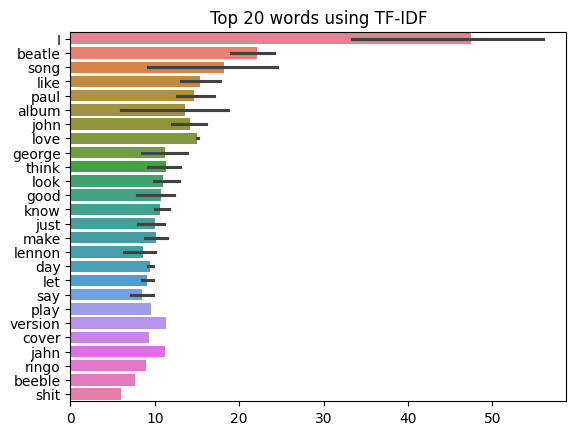

In [ ]:
sns.barplot(tf_top_words, orient="y")
plt.title("Top 20 words using TF-IDF");


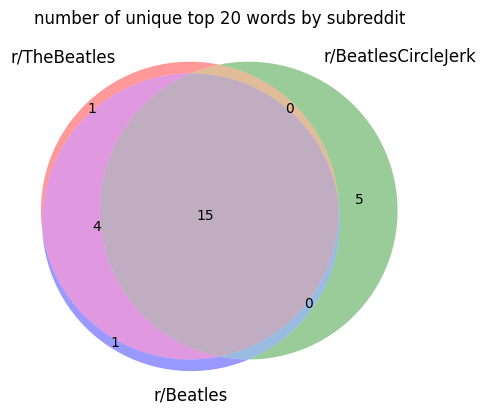

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

set1 = set(dtm_df_xtb.sum().nlargest(20).index)
set2 = set(dtm_df_xcj.sum().nlargest(20).index)
set3 = set(dtm_df_xb.sum().nlargest(20).index)

venn3([set1, set2, set3], ('r/TheBeatles', 'r/BeatlesCircleJerk','r/Beatles'))
# c = venn3_circles(subsets=([set1, set2, set3]), linestyle='dashed')

plt.title("number of unique top 20 words by subreddit")
plt.show()

In [ ]:
set2.difference(set3).difference(set1)

{'jahn', 'lennon', 'number', 'ringo', 'shit'}

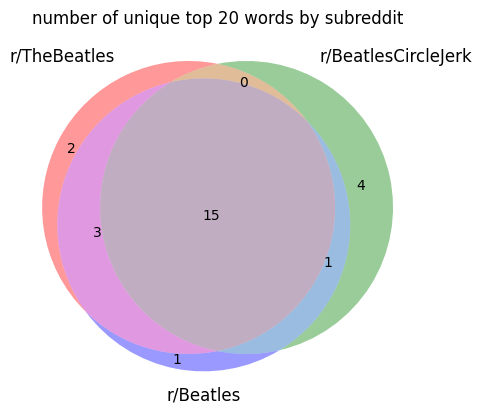

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

set1 = set(t_df_xtb.sum().nlargest(20).index)
set2 = set(t_df_xcj.sum().nlargest(20).index)
set3 = set(t_df_xb.sum().nlargest(20).index)

venn3([set1, set2, set3], ('r/TheBeatles', 'r/BeatlesCircleJerk','r/Beatles'))
# c = venn3_circles(subsets=([set1, set2, set3]), linestyle='dashed')

plt.title("number of unique top 20 words by subreddit")
plt.show()

In [ ]:
set1.difference(set2)


{'cover', 'day', 'let', 'love', 'version'}

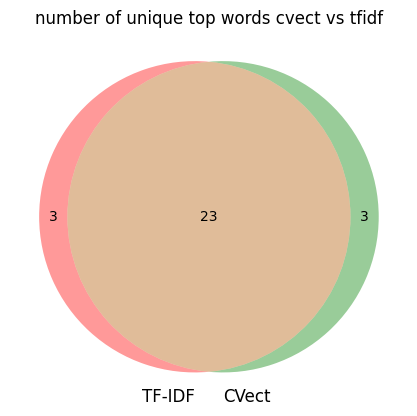

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

set1 = set(list(tf_top_words.columns))
set2 = set(list(top_words.columns))

venn2([set1, set2], ('TF-IDF', 'CVect'))
# c = venn3_circles(subsets=([set1, set2, set3]), linestyle='dashed')

plt.title("number of unique top words cvect vs tfidf")
plt.show()

In [ ]:
set2.difference(set1)

{'number', 'really', 'time'}

Explore some models, see models ipynb file for more on specific models and scores

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
def run_model(pipe):
  nlppipe=pipe
  nlppipe.fit(X_train,y_train)
  print(f"{pipe} score on train data: {nlppipe.score(X_train,y_train)}")

  print(f"{pipe} score on test data: {nlppipe.score(X_test,y_test)}")
  coefs = nlppipe.named_steps['clf'].coef_

#put them in dataframe with words"
  words = nlppipe.named_steps['cvect'].get_feature_names_out()

  df = pd.DataFrame({'coefs': coefs[0], 'words': words})

  df.nlargest(10, 'coefs').plot(kind='barh', x='words', y='coefs')

  y_pred=pipe.predict(X_test)
  confusion_matrix(y_test, y_pred)

  return df


In [ ]:
nlp_pipe = Pipeline(
    steps=[
        ('cvect', CountVectorizer(tokenizer = lemmatizer, stop_words='english', max_features=500,ngram_range=(1,3))),
        ('clf', LogisticRegression())
    ]
)

In [ ]:
nlp_pipe.fit(X_train,y_train)

In [ ]:
nlp_pipe = Pipeline(
    steps=[
        ('cvect', CountVectorizer(tokenizer = lemmatizer)),
        ('clf', LogisticRegression())
    ]
)

In [ ]:
nlp_pipe.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cvect',
                 CountVectorizer(tokenizer=<function lemmatizer at 0x7b83bfc8d360>)),
                ('clf', LogisticRegression())])

In [ ]:
nlp_pipe.score(X_test,y_test)

0.6053333333333333

In [ ]:
coefs = nlp_pipe.named_steps['clf'].coef_

#put them in dataframe with words"
words = nlp_pipe.named_steps['cvect'].get_feature_names_out()

df = pd.DataFrame({'coefs': coefs[0], 'words': words})

<Axes: ylabel='words'>

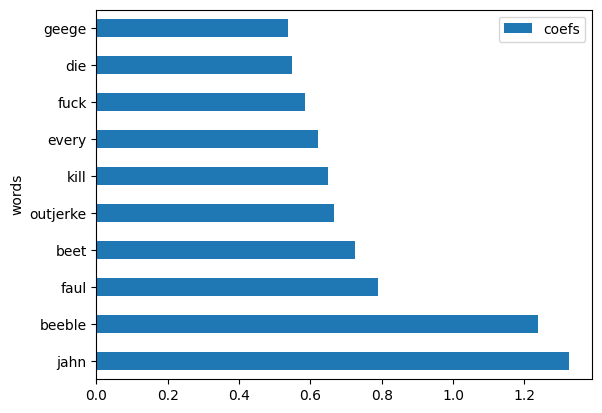

In [ ]:
df.nlargest(10, 'coefs').plot(kind='barh', x='words', y='coefs')


In [ ]:
X_train.shape, y_train.shape

((1125,), (1125,))

In [ ]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Name: sub, Length: 1500, dtype: int64

In [ ]:
def top_words(df):


SyntaxError: incomplete input (<ipython-input-67-d3a09e108846>, line 1)

In [ ]:
grid_params = {'cvect__max_features': [500],'cvect__stop_words': ['english', None],'cvect__ngram_range': [(1,1),(1, 2), (1, 3)]}


grid = GridSearchCV(nlp_pipe, param_grid=grid_params, cv=5, n_jobs=-1, verbose=1)

# grid.fit(X_train, y_train)

In [ ]:
pipel = Pipeline(
    steps=[
        ('cvect', TfidfVectorizer(tokenizer = lemmatizer, max_features = 2000, ngram_range=(1,3))),
        ('clf', LogisticRegression())
    ]
)


In [ ]:
pipetf = Pipeline(
    steps=[
        ('cvect', TfidfVectorizer(tokenizer = lemmatizer)),
        ('clf', LogisticRegression())
    ]
)

grid_params = {
    'cvect__max_features': [100,500, 1000, 3000],
    'cvect__stop_words': ['english', None],
    'cvect__ngram_range': [(1,1),(1, 2), (1, 3)]
}


gridtf = GridSearchCV(pipetf, param_grid=grid_params, n_jobs=1)

gridtf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

KeyboardInterrupt: 

In [ ]:
gridtf.best_params_

{'cvect__max_features': 3000,
 'cvect__ngram_range': (1, 1),
 'cvect__stop_words': 'english'}

In [ ]:
gridtf.best_score_

0.5831111111111111

In [ ]:
pipetf = Pipeline(
    steps=[
        ('cvect', TfidfVectorizer(tokenizer = lemmatizer, max_features=3000, stop_words="english")),
        ('clf', LogisticRegression())
    ]
)

Pipeline(steps=[('cvect', TfidfVectorizer(max_features=3000)),
                ('clf', LogisticRegression())]) score on train data: 0.9173333333333333
Pipeline(steps=[('cvect', TfidfVectorizer(max_features=3000)),
                ('clf', LogisticRegression())]) score on test data: 0.664


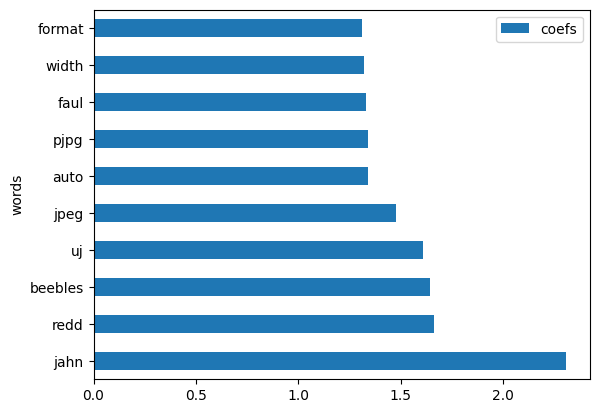

In [ ]:
df=run_model(pipetf)

In [ ]:
pipetf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('cvect',
                 TfidfVectorizer(max_features=3000, stop_words='english',
                                 tokenizer=<function lemmatizer at 0x7b83bfc8d360>)),
                ('clf', LogisticRegression())])

In [ ]:
pipetf.score(X_test,y_test)

0.6186666666666667

In [ ]:
pipetf = Pipeline(
    steps=[
        ('cvect', TfidfVectorizer(max_features=3000)),
        ('clf', LogisticRegression())
    ]
)

In [ ]:
pipetf.fit(X_train,y_train)

Pipeline(steps=[('cvect', TfidfVectorizer(max_features=3000)),
                ('clf', LogisticRegression())])

In [ ]:
pipetf.score(X_test,y_test)

0.664

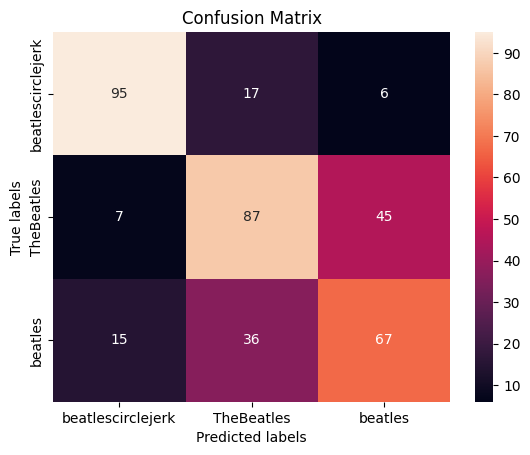

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
y_pred=pipetf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['beatlescirclejerk', 'TheBeatles', 'beatles']); ax.yaxis.set_ticklabels(['beatlescirclejerk', 'TheBeatles', 'beatles']);

In [ ]:
df_btb